<a href="https://colab.research.google.com/github/gio-bis/MLPNS2021/blob/main/CART/TitanicTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import pylab as pl
import os
import json 
%pylab inline
pl.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle")

Populating the interactive namespace from numpy and matplotlib


In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [5]:
!pip install kaggle

In [6]:
!ls kaggle.json

kaggle.json


In [7]:
!chmod 600 kaggle.json

In [8]:
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

In [9]:
!kaggle competitions download -c titanic

gender_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)


In [10]:
!ls

 all_ones_benchmark.zip
 all_zeros_benchmark.zip
 busBusses.npy
 busTimeTable.npy
 CEDIT_6_5_Friuli_Italy_1976.cpg
 CEDIT_6_5_Friuli_Italy_1976.dbf
 CEDIT_6_5_Friuli_Italy_1976.prj
 CEDIT_6_5_Friuli_Italy_1976.sbn
 CEDIT_6_5_Friuli_Italy_1976.sbx
 CEDIT_6_5_Friuli_Italy_1976.shp
 CEDIT_6_5_Friuli_Italy_1976.shp.xml
 CEDIT_6_5_Friuli_Italy_1976.shx
'CEDIT_6_5_Friuli_Italy_1976.zip?raw=true'
'CEDIT_6_5_Friuli_Italy_1976.zip?raw=true.1'
 central_pixel_benchmark.zip
'chimica rel (1).docx.gdoc'
'chimica rel.docx.gdoc'
'Colab Notebooks'
'Copia di Goldstein H. - Meccanica Classica -Pdf - Ita- (2a edizione).pdf'
 country_pop.xls
 e68ceb0a193e4e378b29255b62ab75e0_0.geojson
 e68ceb0a193e4e378b29255b62ab75e0_0.geojson.1
 final_instructions.ipynb
'Fisica I - Meccanica e Termodinamica - Mazzoldi,  Nigro, Voci.pdf'
 galimgs.npy
 gender_submission.csv
 healthcare-dataset-stroke-data.csv
 HiggsBosonCompetition_AMSMetric_rev1.py
 images_test_rev1.zip
 images_training_rev1
 images_training_rev1.zip
 isp

In [11]:
titanic = pd.read_csv("train.csv")

In [12]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
titanic.shape

(891, 12)

In [14]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
titanic = titanic.dropna(subset=["Survived", "Pclass", "Sex", "Age"])
#rimuovo solo i NaN relativi alle colonne che mi interessano

In [16]:
titanic.shape

(714, 12)

In [17]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
titanic["gender"] = titanic.Sex.map({'male':0, 'female':1})
#per sosotituire il genere in un valore numerico

In [19]:
titanic_short = titanic[["Pclass", "gender", "Age"]].dropna()

In [20]:
titanic_short.isna().sum()

Pclass    0
gender    0
Age       0
dtype: int64

In [21]:
titanic_short.values

array([[ 3.,  0., 22.],
       [ 1.,  1., 38.],
       [ 3.,  1., 26.],
       ...,
       [ 1.,  1., 19.],
       [ 1.,  0., 26.],
       [ 3.,  0., 32.]])

###  TEST THE PURITY OF VARIOUS SPLITS

## FIRST SPLIT

# Split by gender

In [22]:
print ("Survived fraction\n M     F \n {0:.2f} {1:.2f}".format   #\n per andare a capo; 2 rappresenta le cifre decimali, f un floating point number
    (((titanic_short.gender.values == 0) & (titanic.Survived.values == 1)).sum() * 1.0 /   #& (AND) sets each bit to 1 if both bits are 1
       (titanic_short.gender.values == 0).sum(),                                           
     ((titanic_short.gender.values == 1) & (titanic.Survived.values == 1)).sum() * 1.0 / 
       (titanic_short.gender.values == 1).sum()))

Survived fraction
 M     F 
 0.21 0.75


In [23]:
print ("Died fraction\n M     F \n {0:.2f} {1:.2f}".format   
    (((titanic_short.gender.values == 0) & (titanic.Survived.values == 0)).sum() * 1.0 /   
       (titanic_short.gender.values == 0).sum(),                                           
     ((titanic_short.gender.values == 1) & (titanic.Survived.values == 0)).sum() * 1.0 / 
       (titanic_short.gender.values == 1).sum())) 

Died fraction
 M     F 
 0.79 0.25


# Split by age (at 6.5)

In [24]:
print ("Survived fraction \n >6.5 <6.5 \n {0:.2f} {1:.2f}".format
     (((titanic_short.Age.values >6.5) & (titanic.Survived.values == 1)).sum() * 1.0 /
        (titanic_short.Age.values >6.5).sum(),
      ((titanic_short.Age.values <6.5) & (titanic.Survived.values == 1)).sum() * 1.0 /
        (titanic_short.Age.values <6.5).sum()))

Survived fraction 
 >6.5 <6.5 
 0.39 0.70


In [25]:
print ("Died fraction \n >6.5 <6.5 \n {0:.2f} {1:.2f}".format
     (((titanic_short.Age.values >6.5) & (titanic.Survived.values == 0)).sum() * 1.0 /
        (titanic_short.Age.values >6.5).sum(),
      ((titanic_short.Age.values <6.5) & (titanic.Survived.values == 0)).sum() * 1.0 /
        (titanic_short.Age.values <6.5).sum()))

Died fraction 
 >6.5 <6.5 
 0.61 0.30


# Split by travel class

In [26]:
print ("Survived fraction \n 1st   2nd \n {0:.2f} {1:.2f}".format
     (((titanic_short.Pclass.values == 1) & (titanic.Survived.values == 1)).sum() * 1.0 /
        (titanic_short.Pclass.values == 1).sum(),
      ((titanic_short.Pclass.values == 2) & (titanic.Survived.values == 1)).sum() * 1.0 /
        (titanic_short.Pclass.values == 2).sum()))

Survived fraction 
 1st   2nd 
 0.66 0.48


In [27]:
print ("Survived fraction \n 2nd   3rd \n {0:.2f} {1:.2f}".format
     (((titanic_short.Pclass.values == 2) & (titanic.Survived.values == 1)).sum() * 1.0 /
        (titanic_short.Pclass.values == 2).sum(),
      ((titanic_short.Pclass.values == 3) & (titanic.Survived.values == 1)).sum() * 1.0 /
        (titanic_short.Pclass.values == 3).sum()))

Survived fraction 
 2nd   3rd 
 0.48 0.24


In [28]:
print ("Survived fraction \n 1st   3rd \n {0:.2f} {1:.2f}".format
     (((titanic_short.Pclass.values == 1) & (titanic.Survived.values == 1)).sum() * 1.0 /
        (titanic_short.Pclass.values == 1).sum(),
      ((titanic_short.Pclass.values == 3) & (titanic.Survived.values == 1)).sum() * 1.0 /
        (titanic_short.Pclass.values == 3).sum()))

Survived fraction 
 1st   3rd 
 0.66 0.24


In [29]:
print ("Survived fraction \n 1st  2nd or 3rd \n {0:.2f} {1:.2f}".format
     (((titanic_short.Pclass.values == 1) & (titanic.Survived.values == 1)).sum() * 1.0 /
        (titanic_short.Pclass.values == 1).sum(),
      (((titanic_short.Pclass.values == 3) | (titanic_short.Pclass.values == 2)) & (titanic.Survived.values == 1)).sum() * 1.0 /
        ((titanic_short.Pclass.values == 3) | (titanic_short.Pclass.values == 2)).sum()))                                        
#| (OR) sets each bit to 1 if one of two bits is 1

Survived fraction 
 1st  2nd or 3rd 
 0.66 0.32


The purest split is by gender, so that it is chosen as the first node 

# SECOND SPLIT

Split by age

In [30]:
print ("Survived fraction of females: \n <6.5  >=6.5   \n {0:.2f}  {1:.2f}".format   
    (((titanic_short.gender.values == 1) & (titanic.Survived.values == 1) & (titanic.Age.values < 6.5)).sum() * 1.0 /   
       ((titanic_short.gender.values == 1)& (titanic.Age.values < 6.5)).sum(),                                           
     ((titanic_short.gender.values == 1) & (titanic.Survived.values == 1) & (titanic.Age.values >= 6.5)).sum() * 1.0 /   
       ((titanic_short.gender.values == 1)& (titanic.Age.values >= 6.5)).sum())) 

Survived fraction of females: 
 <6.5  >=6.5   
 0.74  0.76


In [31]:
print ("Survived fraction of males: \n <6.5  >=6.5   \n {0:.2f}  {1:.2f}".format   
    (((titanic_short.gender.values == 0) & (titanic.Survived.values == 1) & (titanic.Age.values < 6.5)).sum() * 1.0 /   
       ((titanic_short.gender.values == 0)& (titanic.Age.values < 6.5)).sum(),                                           
     ((titanic_short.gender.values == 0) & (titanic.Survived.values == 1) & (titanic.Age.values >= 6.5)).sum() * 1.0 /   
       ((titanic_short.gender.values == 0)& (titanic.Age.values >= 6.5)).sum())) 

Survived fraction of males: 
 <6.5  >=6.5   
 0.67  0.18


Split by class

In [32]:
print ("Survived fraction of females: \n 1st   2nd or 3rd   \n {0:.2f}  {1:.2f}".format   
    (((titanic_short.gender.values == 1) & (titanic.Survived.values == 1) & (titanic.Pclass.values == 1)).sum() * 1.0 /   
       ((titanic_short.gender.values == 1)& (titanic.Pclass.values == 1)).sum(),                                           
     ((titanic_short.gender.values == 1) & (titanic.Survived.values == 1) & ((titanic.Pclass.values == 2) | (titanic.Pclass.values == 3))).sum() * 1.0 /   
       ((titanic_short.gender.values == 1)& ((titanic.Pclass.values == 2) | (titanic.Pclass.values == 3) )).sum())) 

Survived fraction of females: 
 1st   2nd or 3rd   
 0.96  0.65


In [33]:
print ("Survived fraction of males: \n 1st   2nd or 3rd   \n {0:.2f}  {1:.2f}".format   
    (((titanic_short.gender.values == 0) & (titanic.Survived.values == 1) & (titanic.Pclass.values == 1)).sum() * 1.0 /   
       ((titanic_short.gender.values == 0)& (titanic.Pclass.values == 1)).sum(),                                           
     ((titanic_short.gender.values == 0) & (titanic.Survived.values == 1) & ((titanic.Pclass.values == 2) | (titanic.Pclass.values == 3))).sum() * 1.0 /   
       ((titanic_short.gender.values == 0)& ((titanic.Pclass.values == 2) | (titanic.Pclass.values == 3) )).sum())) 

Survived fraction of males: 
 1st   2nd or 3rd   
 0.40  0.15


The purest split is 
- for males by age
- for females by travel class

### TREE MODEL

In [34]:
from sklearn import tree
clf =  tree.DecisionTreeClassifier(max_depth=3, criterion="gini",     
                        random_state=222).fit(titanic_short.values, 
                                              titanic["Survived"])
#criterion è la funzione che misura la qualità dello split 
#"gini" for the imputity, "entropy" for the information gain             

clf.score(titanic_short.values, titanic["Survived"])

0.8081232492997199

In [35]:
import graphviz 
dot_data = tree.export_graphviz(clf, feature_names=titanic_short.columns, 
                                out_file=None)  
#This function generates a GraphViz representation of the decision tree
#feature_names è una lista di stringhe 
graph = graphviz.Source(dot_data) 

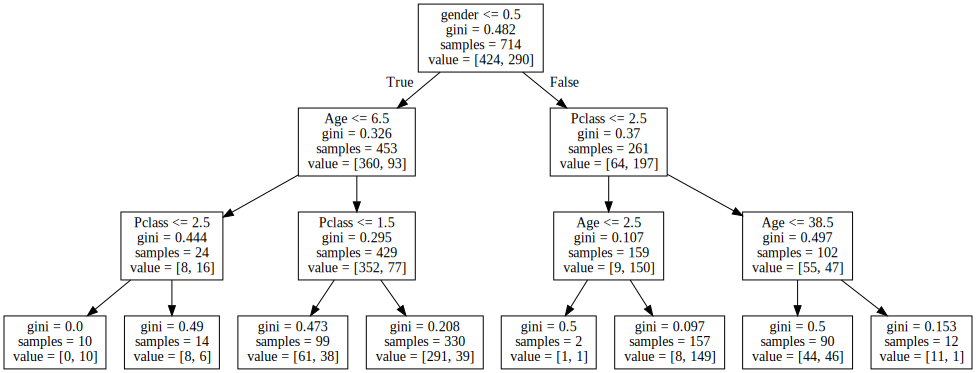

In [36]:
graph

In [37]:
graph.render("TitanicTree")
#Save the source to file and render with the Graphviz engine

'TitanicTree.pdf'

# ENSEMBLE METHOD

#Random Forest

In [38]:
from sklearn import ensemble
rf =  ensemble.RandomForestClassifier(max_depth=3, criterion="gini", 
                                       random_state=222).fit(titanic_short.values, 
                                                             titanic["Survived"])
print ("score %.2f"%rf.score(titanic_short.values, titanic["Survived"]))

score 0.82


Cambio max_depth

In [39]:
from sklearn import ensemble
rf =  ensemble.RandomForestClassifier(max_depth=4, criterion="gini", 
                                       random_state=222).fit(titanic_short.values, 
                                                             titanic["Survived"])
print ("score %.2f"%rf.score(titanic_short.values, titanic["Survived"]))

score 0.82


In [40]:
from sklearn import ensemble
rf =  ensemble.RandomForestClassifier(max_depth=None, criterion="gini", 
                                       random_state=222).fit(titanic_short.values, 
                                                             titanic["Survived"])
#If max_depth = None, then nodes are expanded until all leaves are pure or until 
#all leaves contain less than min_samples_split samples
print ("score %.2f"%rf.score(titanic_short.values, titanic["Survived"]))

score 0.90


#Gradient Boosted Trees

In [41]:
gbt = ensemble.GradientBoostingClassifier(max_depth=4, 
                                           random_state=222).fit(titanic_short.values, 
                                                                 titanic["Survived"])
print ("score %.2f"%gbt.score(titanic_short.values, titanic["Survived"]))

score 0.89


In [42]:
gbt = ensemble.GradientBoostingClassifier(max_depth=None, 
                                           random_state=222).fit(titanic_short.values, 
                                                                 titanic["Survived"])
print ("score %.2f"%gbt.score(titanic_short.values, titanic["Survived"]))

score 0.90


##Feature importance 
You can measure the influence that each feature has on the decision

In [43]:
print("Random Forest feature importance")
for f,fi in zip(titanic_short.columns, rf.feature_importances_):
  print (f, fi.round(2))

#rf.feature_importances_ return the feature importances (the higher, the 
#more important the feature)

Random Forest feature importance
Pclass 0.19
gender 0.35
Age 0.46


In [44]:
print("Gradient Boosted Tree feature importance")
for f,fi in zip(titanic_short.columns, gbt.feature_importances_):
  print (f, fi.round(2))

Gradient Boosted Tree feature importance
Pclass 0.2
gender 0.41
Age 0.4


calculate feature importance uncertainties for RF method

In [45]:
fistd = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
print("Random Forest feature importance")
for f, fi, s in zip (titanic_short.columns, rf.feature_importances_, fistd):
  print (f, fi.round(2), "+/-", s.round(2))

Random Forest feature importance
Pclass 0.19 +/- 0.04
gender 0.35 +/- 0.05
Age 0.46 +/- 0.05


In [46]:
np.arange?

In [47]:
pl.barh?

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


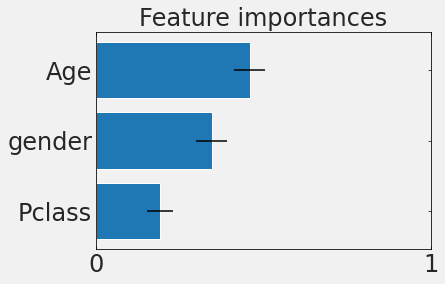

In [48]:
indices = np.argsort(rf.feature_importances_) #crea un array di indici ordinati
pl.figure()
pl.title("Feature importances")
pl.barh(np.arange(rf.feature_importances_.shape[0]), #crea un array di 3 elementi
        rf.feature_importances_[indices], #width of the bars to the coordinates 
       xerr=fistd[indices], align="center")
pl.xticks(range(rf.feature_importances_.shape[0]), indices)
pl.yticks(range(rf.feature_importances_.shape[0]), 
          labels=titanic_short.columns[indices])
pl.xlim(0, 1)
pl.show()

In [49]:
from sklearn.metrics import confusion_matrix
#Compute confusion matrix to evaluate the accuracy of a classification

#C_{i, j}
#is equal to the number of observations known to be in group :math:`i` and
#predicted to be in group :math:`j`

In [50]:
def plot_confusion_matrix(y_true, y_pred,
                          normalize=True,
                          title='',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """         
    if normalize:
          title = title + ' Normalized confusion matrix'
    else:
          title = title + ' Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    
    pl.imshow(cm, cmap="bone")
    pl.title(title)
    pl.colorbar()
    pl.axis('off')

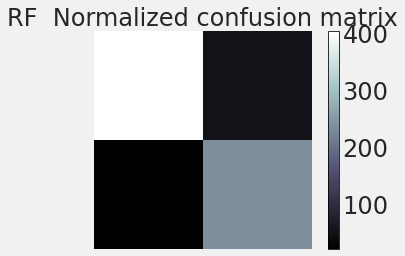

In [51]:
plot_confusion_matrix(rf.predict(titanic_short), 
                      titanic["Survived"],
                      title="RF ")

In [57]:
rf.predict?

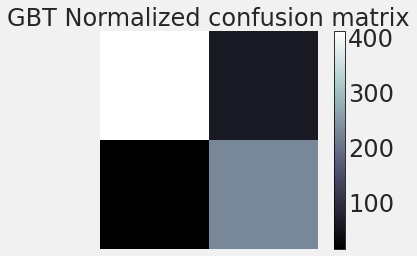

In [52]:
plot_confusion_matrix(gbt.predict(titanic_short), 
                      titanic["Survived"],
                      title="GBT")